<a href="https://www.kaggle.com/adigli/bank-churners-eda?scriptVersionId=85242120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory data anaysis of a bank customer churn datset

The dataset can be found on [here](https://www.kaggle.com/sakshigoyal7/credit-card-customers) on kaggle.com.

## Intoduction

In this notebook contains a data analysis on the credit card customers data to draw infrences on the churning customers behaviors before they cancel thier credit cards. Then random forrest algorithm and a neural network will be used to classify the customers as Current customers (Customers who did not cancel there credit cards) and churning customers (Customers who cancelled their credit cards). The random forrest will be used to analyse the importance of each feature and the fie least important features will be removed before trining neural network. A datasampling technique using SMOTE was introduced in version three to reduce gape between two classes

## What is churn and why does it matter? 
Customer churn means 

Customers leaving the product or service provided by companies is commun do to a multitude of factors. Understanding this metric for companies is vital as it provides better insights in 

For the bank, understanding why the custermers are churning is very important as the competition of new fintechs is growing. A growing churn can mean a couple of things:
- The economic implication of a growing churn rate will result in lowering the customer lifetime value, witch may lead to lower revenue and profit margins. It may also lead to a lower market share due to loss of customers to compatitors. One other economic aspect related to churn is the term customer accuazision cost, with is the avrege cost for accuaring a new customer. The norm is that its more expensive to accuire a new customer then trying to keed an existing customer. 
- If customers are leaving it may also indicate that some things are not working with the product or service. Those type of signals in the organisation are important to understand and aress as soon as possible to keep the current customers and gain new ones. 

This is why it's one of the most important metrics to understand and monitor for companies.




## Problem Statement
 To understand churn it would be benefitial to set some relevant metrics when mesuring it. One central metic to mesure is time, ie. how long has the client used the products/services? The relevant metrics for mesuring churn may vary depending on the industry and type of customer interaction that is important for the company. For most companies it may be revenue, conversion rates or some other similar metric, but for some, like facebook / instagram, it may be engagement and time spend on the platform. 

**The information given about the dataset is:** <br> 
_A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off._


## The objectives 
> **The objective of this analysis is to understand what customers are at risk for churning and visualize that in a clear and consise way.**


**The scope:**

**The scope is to do an data exploratory analysis to understand what circumstances effect the churnrate. If possible we will explore proposals for improving the churnrate or what data and questions would be relevant to explore further to lower the churnrate.**


_We are going to cover the following steps:_
- Download the dataset
- Import/install libraries
- Import the data into a pandas dataframe
- Get to know more about the dataset
- Clean the dataset 
- Do an exploratory data analysis
- What insigts can we gain from the analysis? 
- What is the impact of the insights? Action items to explore. 
- Further exploration and questions

References


Let's get started.

### Questions in the data analysis:
- Does the credit card utilization ratio lower in churning customers?
- What is the influence of the income category on people with a cetrain martial status for leaving the service?
- What card category customers needs most attention from the service providers?

First lets import the libraries we will be using. Today we will use pandas for the exploratory data analysis. For visualizing the data we will be using matplotlib, seaborn and plotly 

In [1]:
# Remove the # and run the cell if the you get an error message.
#!pip install opendatasets -q 


Today we will use the [pandas]() and [numpy] ()libraries for loading and cleaning the dataset. 


In [2]:
# For importing and analysing the data
#import opendatasets as od #used for downloading the dataset from kaggle
import pandas as pd #used for the main exploratory data analysis and working with the dataset
import numpy as np #used for numerical and statistical analysis


### Downloading the data

In [3]:
#opendatasets is great for downloading dataset from kaggle, when you run the notebook on other platforms line binder, colag or on your own computer. It not needed when you run the notebook on kaggle.com

#dataset_url = 'https://www.kaggle.com/sakshigoyal7/credit-card-customers'
#od.download(dataset_url)

### Importing the data into a pandas dataframe

In [4]:
# First, lets import the data into a dataframe by reding the csv file we downloaded
credit_data = pd.read_csv('../input/credit-card-customers/BankChurners.csv')


#Second, lets make a copy of the dataframe (df) to use for the initial exploration of the data
df = credit_data.copy()

In [5]:
# Lets look at the shape of the dataset

print('Data has {} samples or rows and {} features or columns.'.format(df.shape[0], df.shape[1]))

Data has 10127 samples or rows and 23 features or columns.


**Now lets see the first 10 rows of the dataset:**

In [6]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [7]:
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

At a quick glase we can allready see that the second columns, `Attrition_Flag` is the one feature that shows us the customers that left, and as such is proving a way to fint the churned customer. A second quick observation is that the colums `Marital_Status` has some `Unknows`values. Will will explore if that feature may have some relevans during the exploratory data analysis. 

Lets get a bit more aquinted with the dataset the exploring more info about it with the following commands: `df.info()` and `df.describe()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

By the display we see the columns and the count of values for each column. We also see there is no `null` and `N/A`values in any of the collumns. It may still be some values that are unknown or wrong but those we will need to find in some other way. 

Now lets see what columns contain numerical values. We can display them by this command:

In [9]:
df.select_dtypes(include=np.number).columns.tolist()

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

While looking at the numerical columns we can get the most common statistical data just by using the `df.describe()` command. 

The display shows the `count` `min`, `max`, `std` and `mean` and the `median`along with the lower and upper quartiles. With this we can get an excellent view into the range of the dataset. By knowing the percentile points (25th, 50th, and 75th) aswell as the `min`and `max`we can find outliers and [skewness](https://en.wikipedia.org/wiki/Skewness) of the distribution of the data for each column. 

By looking at the columns we can see that 

In [10]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Categorical features

Now lets take a look at the cathegorical features:


### Data cleaning


Now lets take a look at what columns are of most intresting and what columns we can remove.


**Remove uncessary columns**

We got the information from the dataset source that the last two columns where to be deleted. 

In [11]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
          ], axis = 1, inplace = True)

**Rename columns**

Now lets see if we can rename some colums to make it short and easier to understand.

In [12]:
df.rename(columns = {'CLIENTNUM':'Client_nr', 'Attrition_Flag': 'Status','Customer_Age': 'Age', 'Education_Level' : 'Education'}, inplace = True)
df.head()

,Client_nr,Status,Age,Gender,Dependent_count,Education,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Explaratory data analysis

**Lets explore the data and provid insightful analysis by answering some relevant questions:**

- [ ] Does the credit card utilization ratio lower in churning customers?
- [ ] Are there any significant diffrenceses between the `Attrited Customer` vs `Existing Customer` for the categorial features for the dataset?

## Visualizing the data

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques. We'll use the words chart, plot, and graph interchangeably in this tutorial.

To begin, let's install and import the libraries. We'll use the matplotlib.pyplot module for basic plots like line & bar charts. It is often imported with the alias plt. We'll use the seaborn module for more advanced plots. It is commonly imported with the alias sns.

Now, lets explore the dataset to understand the customers that churned 

In [13]:
#!pip install matplotlib seaborn --upgrade --quiet

**Importing libraries**
- [Matplotlib](https://matplotlib.org/): Plotting and visualization library for Python. We'll use the pyplot module from matplotlib. As convention, it is often imported as plt.
- [Seaborn](https://seaborn.pydata.org/): An easy-to-use visualizetion library that builds on top of Matplotlib and lets you create beautiful charts with just a few lines of code.


In [14]:
# Lets import the libraries we will be using in the analysis 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#plt.style.available

In [16]:
# Set the global plotting parameters
sns.set_style('whitegrid') #("darkgrid")
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now lets explore the data about customers. First we will explore the features for the customers in general, mainly cathegorical data, for both the existing and attrited customers. 
Aftar that we will explore the bank data about the two custemer segments of intresst. 

We can start with finding out how many have left and how many are still existing customers:
- How many existing custermers and attrited customers do we have? 

In [17]:
df['Status'].value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Status, dtype: int64

In [18]:
 pd.crosstab(df['Gender'], df['Status'], margins = True, margins_name = "Total")

Status,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


In [19]:
#Now lets make two sets of data for the existing and the attrited customers respectivly so its easyer to compare the two segments

#Existing Customer
ec = df[df['Status'] == "Existing Customer"] 
#Attrited Customer
ac = df[df['Status'] == "Attrited Customer"]


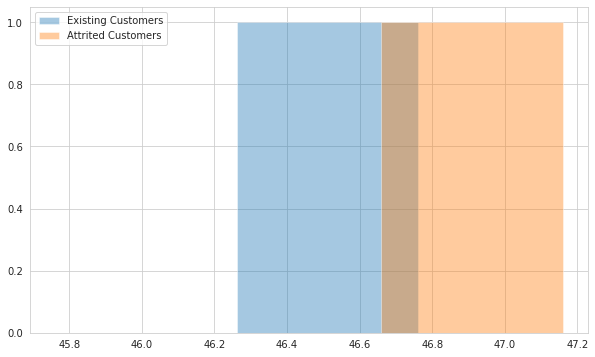

In [20]:
plt.hist(ec.Age.mean(), alpha=0.4, bins=2);
plt.hist(ac.Age.mean(), alpha=0.4, bins=2);
plt.legend(['Existing Customers', 'Attrited Customers']);

In [21]:
df['Status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' 

Existing Customer    83.9%
Attrited Customer    16.1%
Name: Status, dtype: object

(array([ 164.,  236.,  455., 1026., 1082., 2891., 1277.,  690.,  387.,
         292.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <BarContainer object of 10 artists>)

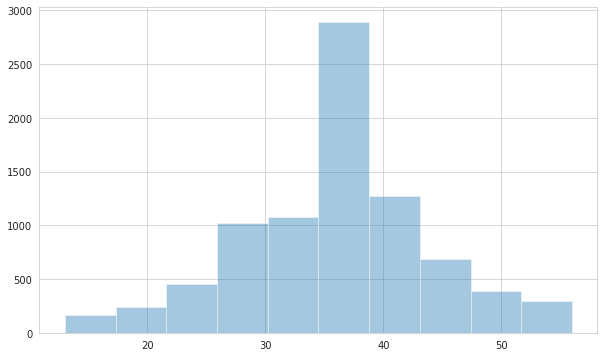

In [22]:
plt.hist(ec.Months_on_book, alpha=0.4)#bins=4);
#plt.hist(ac.Gender, alpha=0.4, bins=2);
#plt.legend(['Existing Customers', 'Attrited Customers']);

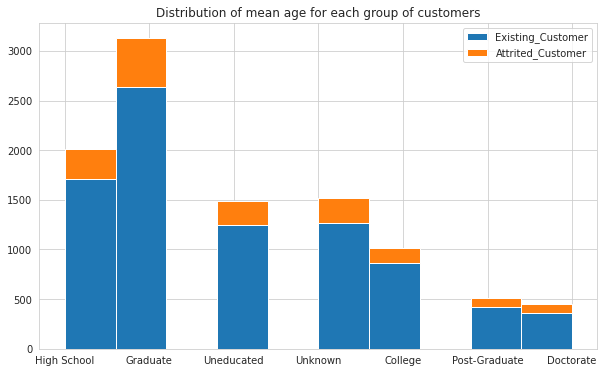

In [23]:
plt.title('Distribution of mean age for each group of customers')

plt.hist([ec.Education, ac.Education], 
         #bins=7, 
         stacked=True);
plt.legend(['Existing_Customer','Attrited_Customer']);

(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <BarContainer object of 10 artists>)

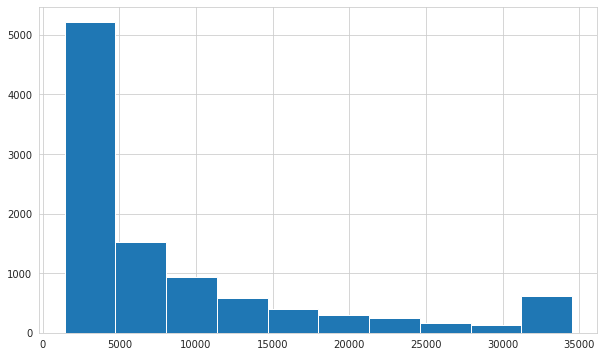

In [24]:
plt.hist(df['Credit_Limit'])

In [25]:
df.columns

Index(['Client_nr', 'Status', 'Age', 'Gender', 'Dependent_count', 'Education',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

(array([2013., 3128.,    0., 1487.,    0., 1519., 1013.,    0.,  516.,
         451.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

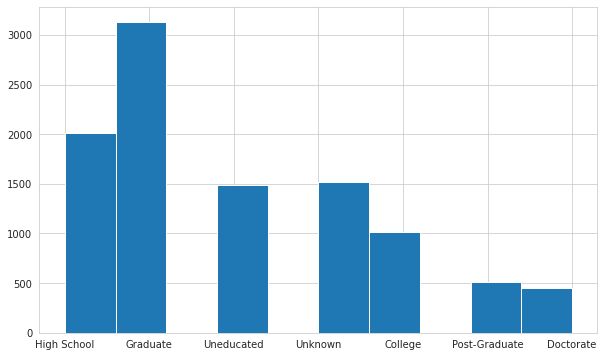

In [26]:
plt.hist(df['Education'])

How many % of the total customers attrited?